In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-market-dataset/symbols_valid_meta.csv
/kaggle/input/stock-market-dataset/stocks/MTL.csv
/kaggle/input/stock-market-dataset/stocks/JOE.csv
/kaggle/input/stock-market-dataset/stocks/DRE.csv
/kaggle/input/stock-market-dataset/stocks/CTY.csv
/kaggle/input/stock-market-dataset/stocks/AMSF.csv
/kaggle/input/stock-market-dataset/stocks/IMH.csv
/kaggle/input/stock-market-dataset/stocks/GFL.csv
/kaggle/input/stock-market-dataset/stocks/CLM.csv
/kaggle/input/stock-market-dataset/stocks/UBER.csv
/kaggle/input/stock-market-dataset/stocks/NEBU.csv
/kaggle/input/stock-market-dataset/stocks/SGB.csv
/kaggle/input/stock-market-dataset/stocks/WWW.csv
/kaggle/input/stock-market-dataset/stocks/UTSI.csv
/kaggle/input/stock-market-dataset/stocks/PBB.csv
/kaggle/input/stock-market-dataset/stocks/UFCS.csv
/kaggle/input/stock-market-dataset/stocks/ZM.csv
/kaggle/input/stock-market-dataset/stocks/DCPH.csv
/kaggle/input/stock-market-dataset/stocks/HALL.csv
/kaggle/input/stock-market-dataset/s

In [2]:
import multiprocessing
import pandas as pd
import polars as pl
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier,XGBRegressor
import textwrap as tw
from pathlib import Path
from sklearn.metrics import auc,roc_curve
from sklearn.metrics import auc,roc_curve

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow_datasets as tfds
from PIL import Image, ImageEnhance
import cv2
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import joblib
import math

import random
import shutil
import pathlib
import itertools
import math
import datetime as dt
from IPython.display import clear_output
import concurrent.futures

import matplotlib.dates as mdates
from skimage.transform import resize
from tqdm import tqdm

from matplotlib.pyplot import imshow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from keras import models
from keras import layers
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import BatchNormalization
from tensorflow import keras

from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *

from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import ResNet50
from IPython.core.display import Image

from tensorflow.keras.applications import VGG16
from keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.utils import plot_model
from keras.models import load_model, Model
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam, SGD
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import LSTM, Dense, Dropout
from imblearn.over_sampling import RandomOverSampler 
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [3]:
mb="../input/stock-market-dataset/stocks/ABM.csv"
mb = pd.read_csv(mb,na_values=["null"],index_col="Date",parse_dates=True,infer_datetime_format=True)
mb

/tmp/ipykernel_32/2259720281.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  mb = pd.read_csv(mb,na_values=["null"],index_col="Date",parse_dates=True,infer_datetime_format=True)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-03-17,0.000000,0.950000,0.933333,0.933333,0.027191,18400
1980-03-18,0.000000,0.933333,0.908333,0.916667,0.026705,32800
1980-03-19,0.916667,0.916667,0.916667,0.916667,0.026705,0
1980-03-20,0.000000,0.933333,0.925000,0.933333,0.027191,29600
1980-03-21,0.000000,0.933333,0.933333,0.933333,0.027191,9600
...,...,...,...,...,...,...
2020-03-26,21.000000,22.450001,20.730000,22.049999,21.882542,1031800
2020-03-27,21.209999,23.620001,21.000000,21.990000,21.822998,1455700
2020-03-30,22.209999,24.219999,21.600000,24.170000,23.986443,602300


In [4]:
mb.describe().T


,count,mean,std,min,25%,50%,75%,max
Open,10098.0,14.313921,11.650365,0.000000,4.000000,14.187500,21.309999,4.499000e+01
High,10098.0,14.669030,11.557603,0.866667,4.031250,14.437500,21.637499,4.512000e+01
Low,10098.0,14.341660,11.307207,0.866667,4.000000,14.000000,20.957500,4.467000e+01
Close,10098.0,14.513697,11.438003,0.866667,4.000000,14.250000,21.340000,4.479000e+01
Adj Close,10098.0,10.985548,11.327190,0.025249,0.774204,8.463741,17.016195,4.227962e+01
Volume,10098.0,158516.963755,222692.597814,0.000000,28400.000000,91500.000000,210000.000000,4.552500e+06


In [5]:
mb.isnull().sum()


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Dataframe Shape:  (10098, 6)
Null Value Present:  False


<Axes: xlabel='Date'>

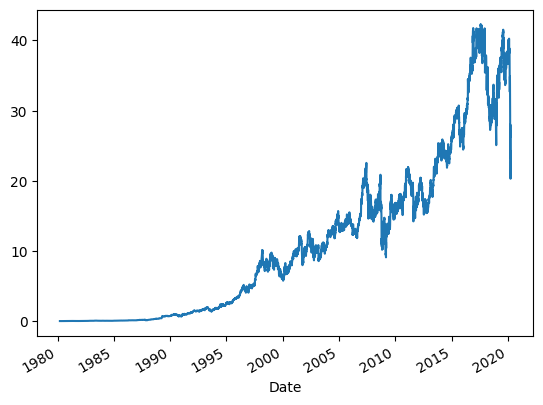

In [6]:
print("Dataframe Shape: ", mb. shape)
print("Null Value Present: ", mb.isnull().values.any())
mb["Adj Close"].plot()

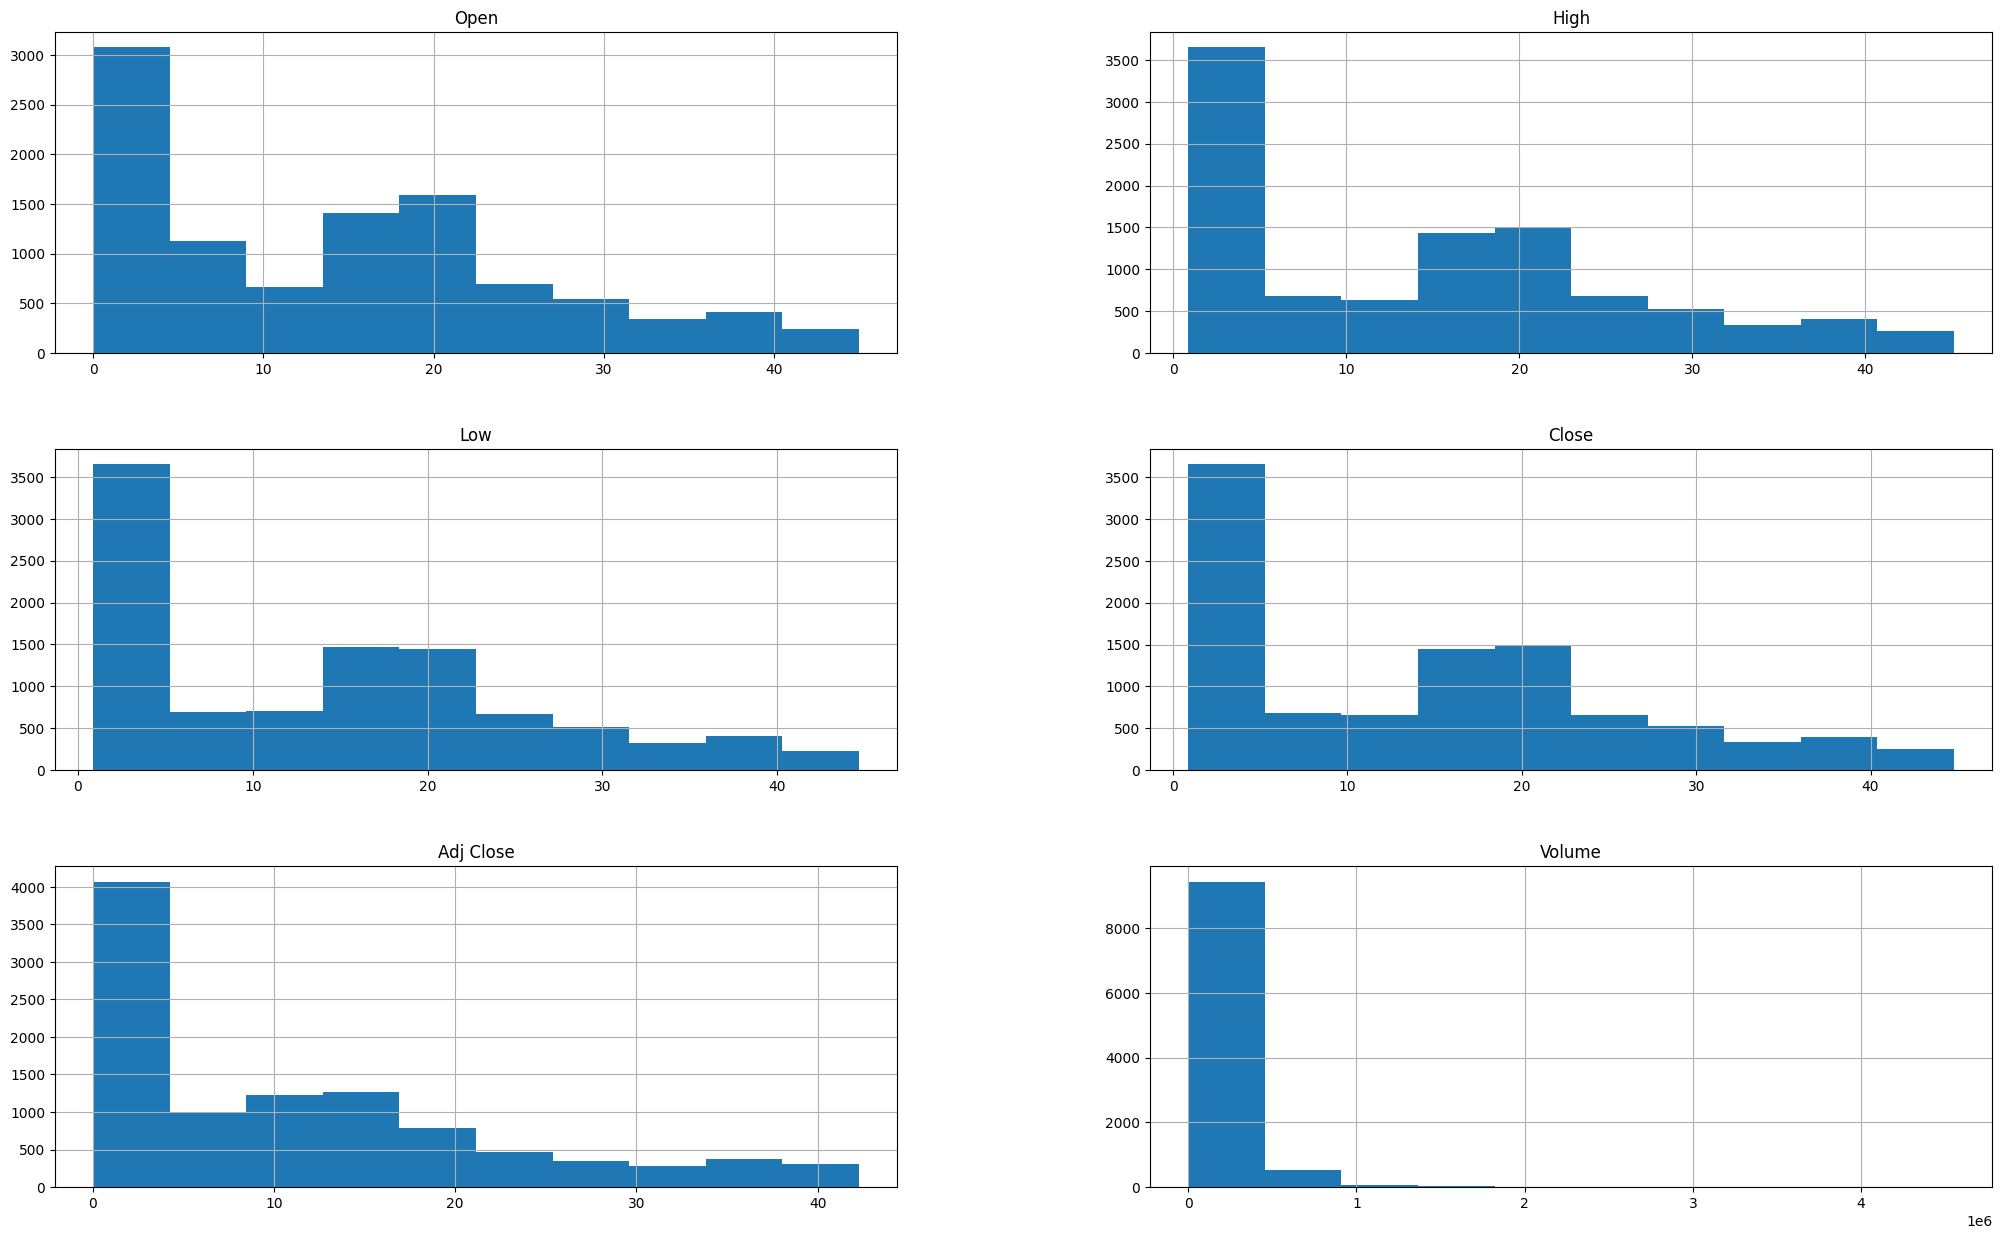

In [7]:
mb.hist(figsize=(25,15))
plt.show()

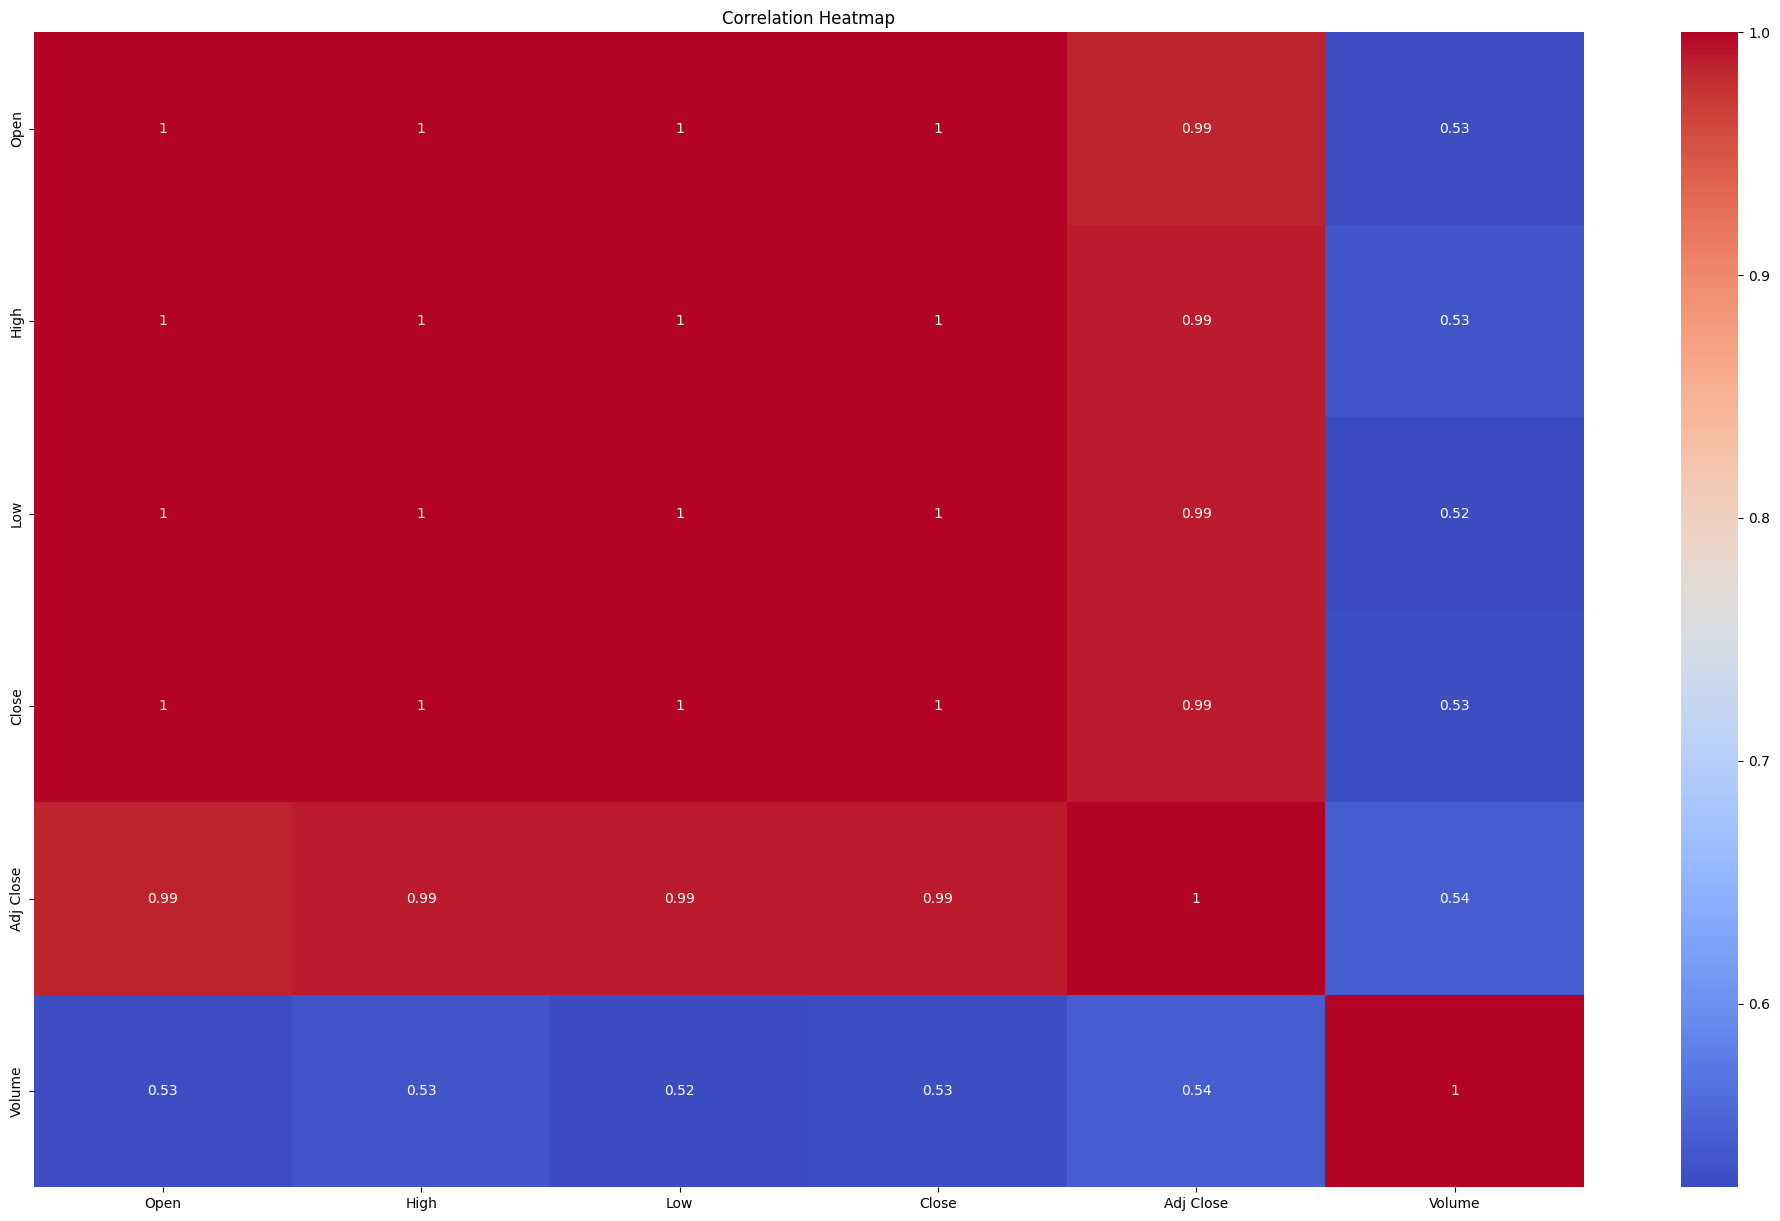

In [8]:
plt.figure(figsize=(25, 15))
correlation_matrix = mb.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
mb = mb['Open'].values
mb = mb.reshape(-1, 1)

In [10]:
train0 = np.array(mb[:int(mb.shape[0]*0.8)])
test0 = np.array(mb[int(mb.shape[0]*0.8):])
scaler = MinMaxScaler(feature_range=(0,1))
train = scaler.fit_transform(train0)
test = scaler.transform(test0)
def create_dataset(mb):
    x = []
    y = []
    for i in range(50, mb.shape[0]):
        x.append(mb[i-50:i, 0])
        y.append(mb[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

xtrain, ytrain = create_dataset(train)
xtest, ytest = create_dataset(test)
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], 1))

In [11]:
model = Sequential()

model.add(LSTM(units=96, return_sequences=True, input_shape=(xtrain.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 96)            37632     
                                                                 
 dropout (Dropout)           (None, 50, 96)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_1 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_2 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_3 (LSTM)               (None, 96)                7

In [12]:
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], 1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [13]:
history=model.fit(xtrain, ytrain, epochs=50, batch_size=32)
model.save('Stock Market.h5')

Epoch 1/50
251/251 [==============================] - 34s 112ms/step - loss: 0.0038
Epoch 2/50
251/251 [==============================] - 28s 113ms/step - loss: 0.0016
Epoch 3/50
251/251 [==============================] - 28s 112ms/step - loss: 0.0013
Epoch 4/50
251/251 [==============================] - 28s 114ms/step - loss: 0.0011
Epoch 5/50
251/251 [==============================] - 28s 113ms/step - loss: 0.0011
Epoch 6/50
251/251 [==============================] - 28s 112ms/step - loss: 9.7970e-04
Epoch 7/50
251/251 [==============================] - 28s 112ms/step - loss: 9.7619e-04
Epoch 8/50
251/251 [==============================] - 28s 112ms/step - loss: 8.3236e-04
Epoch 9/50
251/251 [==============================] - 28s 112ms/step - loss: 8.0365e-04
Epoch 10/50
251/251 [==============================] - 28s 113ms/step - loss: 7.8762e-04
Epoch 11/50
251/251 [==============================] - 28s 113ms/step - loss: 7.3153e-04
Epoch 12/50
251/251 [=============================

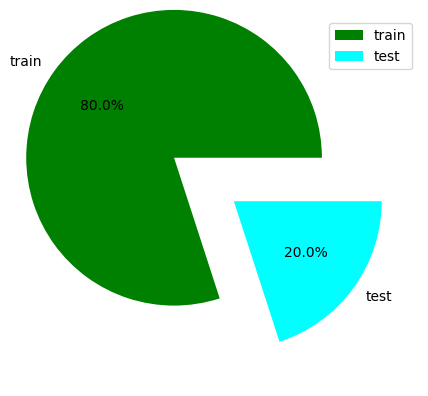

In [23]:
mylabels = ["train","test"]

plt.pie([len(train), len(test)], 
labels=['train','test'], autopct='%.1f%%', colors=['green','cyan'], explode=(0.5, 0))
plt.legend()
plt.show() 


loss at epoch 1: 0.0038361400365829468
loss at epoch 50: 0.00045969037455506623


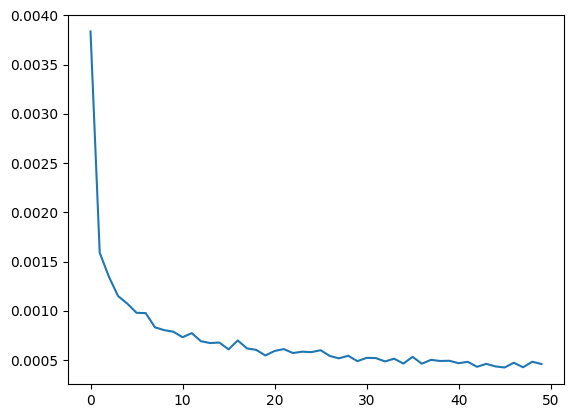

In [24]:
print(f"loss at epoch 1: {history.history['loss'][0]}")
print(f"loss at epoch 50: {history.history['loss'][49]}")
plt.plot(history.history['loss'])

In [25]:
model = load_model('Stock Market.h5')


62/62 [==============================] - 3s 34ms/step


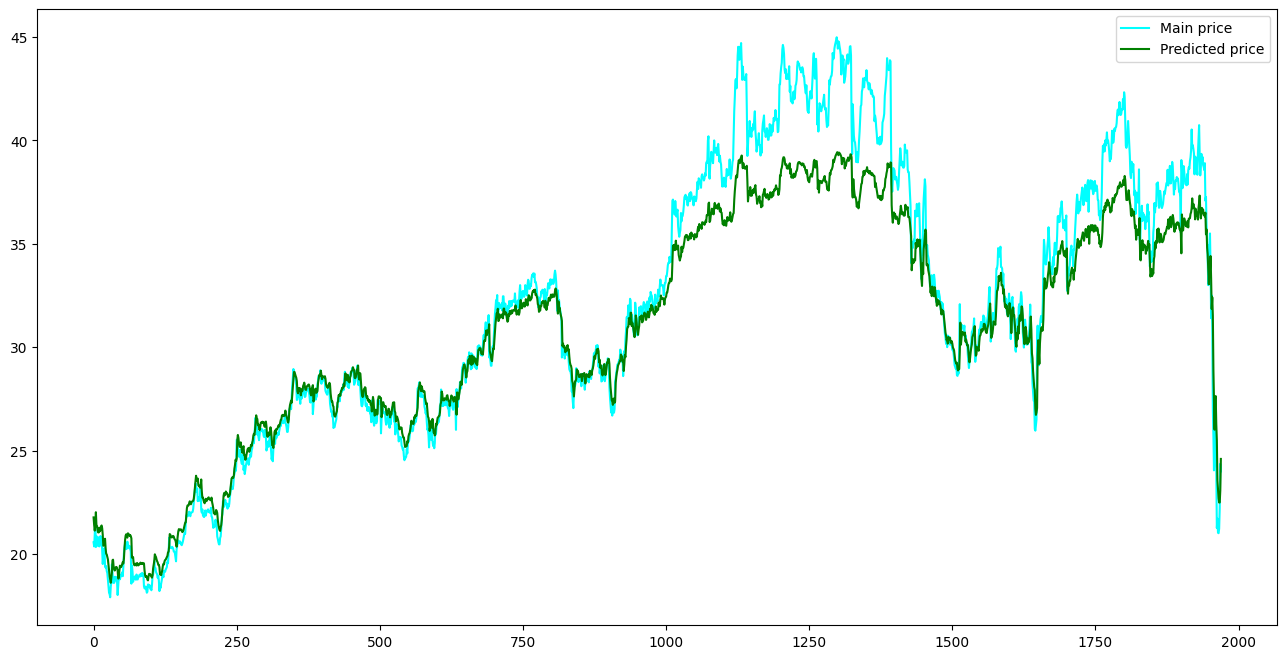

In [26]:
predictions = model.predict(xtest)
predictions = scaler.inverse_transform(predictions)
ytest_scaled = scaler.inverse_transform(ytest.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#0000')
ax.plot(ytest_scaled, color='cyan', label='Main price')
plt.plot(predictions, color='green', label='Predicted price')
plt.legend()

62/62 [==============================] - 2s 35ms/step


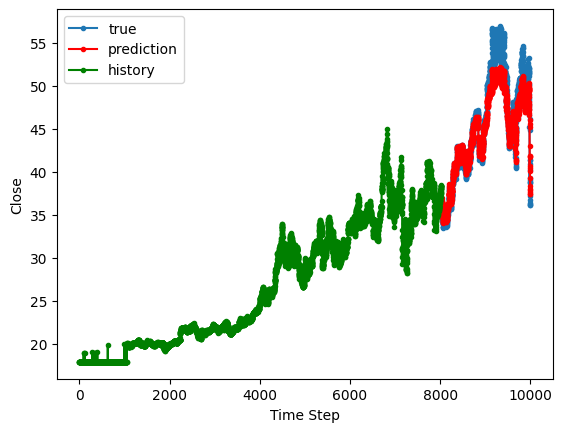

In [27]:
ypred = model.predict(xtest)
train_max=test0.max()
train_min=test0.min()

ytest = ytest*(train_max - train_min) + train_min
ypred = ypred*(train_max - train_min) + train_min
ytrain = ytrain*(train_max - train_min) + train_min


plt.plot(np.arange(len(ytrain), len(ytrain) + len(ytest)), ytest.flatten(), marker='.', label="true")
plt.plot(np.arange(len(ytrain), len(ytrain) + len(ytest)), ypred.flatten(), 'r', marker='.', label="prediction")
plt.plot(np.arange(0, len(ytrain)), ytrain.flatten(), 'g', marker='.', label="history")
plt.ylabel('Close')
plt.xlabel('Time Step')
plt.legend()
plt.show()

In [28]:
train_predict=model.predict(xtrain)
test_predict=model.predict(xtest)

62/62 [==============================] - 2s 35ms/step


In [30]:
train_predict=scaler.inverse_transform(train_predict)

In [31]:
n_past = 60


xtrain, ytrain = [], []
for i in range(n_past, len(train)):
    xtrain.append(train[i - n_past:i, 0])
    ytrain.append(train[i, 0])
xtrain, ytrain = np.array(xtrain), np.array(ytrain)


xtest, ytest = [], []
for i in range(n_past, len(test)):
    xtest.append(test[i - n_past:i, 0])
    ytest.append(test[i, 0])
xtest, ytest = np.array(xtest), np.array(ytest)

In [32]:
last_sequence = xtest[-1]


last_sequence = last_sequence.reshape(1, n_past, 1)


predictions_next_10_days = []
for _ in range(10):
    next_day_prediction = model.predict(last_sequence)
    predictions_next_10_days.append(next_day_prediction[0, 0])  
    last_sequence = np.roll(last_sequence, -1, axis=1)  
    last_sequence[0, -1, 0] = next_day_prediction  

predictions_next_10_days = scaler.inverse_transform(np.array(predictions_next_10_days).reshape(-1, 1))

print("Predictions for the next 10 days:")
for i, prediction in enumerate(predictions_next_10_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")

1/1 [==============================] - 0s 29ms/step
Predictions for the next 10 days:
Day 1: Predicted Price = 24.588943481445312
Day 2: Predicted Price = 25.107053756713867
Day 3: Predicted Price = 25.4835205078125
Day 4: Predicted Price = 25.785266876220703
Day 5: Predicted Price = 26.051950454711914
Day 6: Predicted Price = 26.278207778930664
Day 7: Predicted Price = 26.452312469482422
Day 8: Predicted Price = 26.570981979370117
Day 9: Predicted Price = 26.64048957824707
Day 10: Predicted Price = 26.673532485961914


NameError: name 'companyname' is not defined

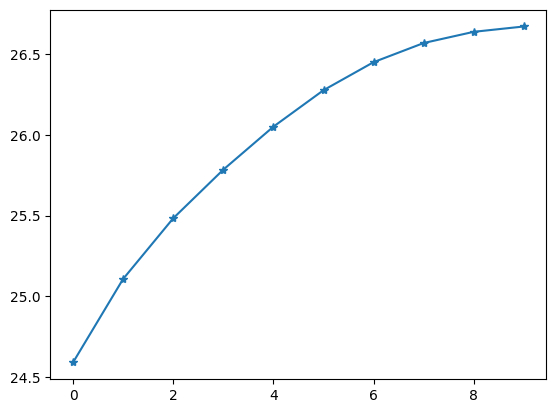

In [35]:
plt.plot(predictions_next_10_days, marker='*')
plt.title(f'Predicted stock price of {companyname} for next 10 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 10), ['Day1', 'Day2', 'Day3', 'Day4', 'Day5', 'Day6', 'Day7', 'Day8', 'Day9', 'Day10'])
plt.grid(True)
plt.show()

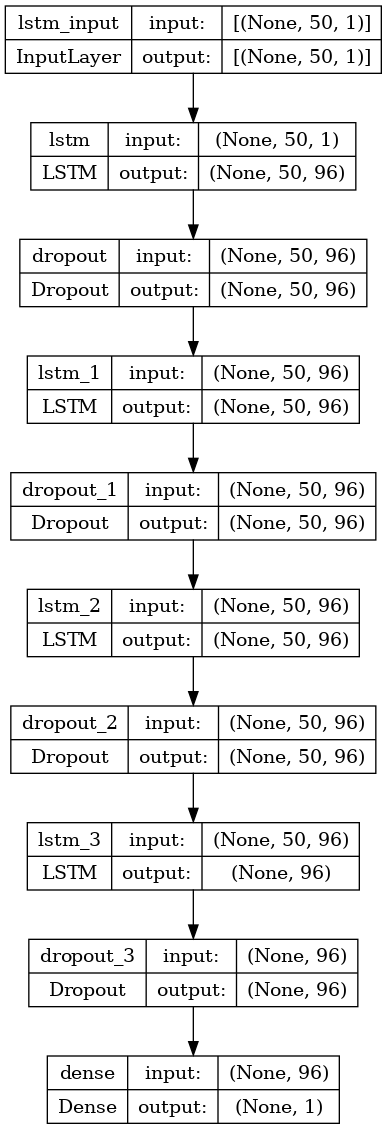

In [36]:
plot_model(model, to_file='UCF101.png', show_shapes=True, show_layer_names=True)
